Description

In [ ]:
# GIB Cre 
# TRE-ZF 
# look at excel spreadsheets for the amounts (v2) (internal note)

# Data and Functions

## Import Functions and set directories ##

In [2]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_GIBCre_TREZF/'

## Import Data ##

### Biorep 1

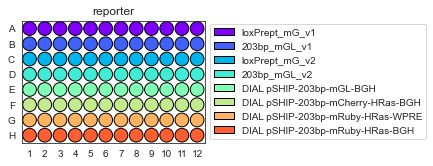

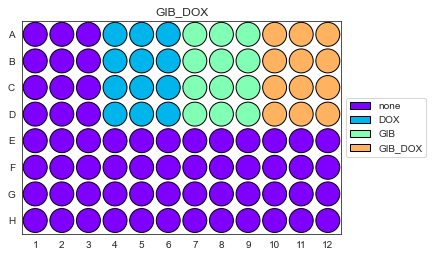

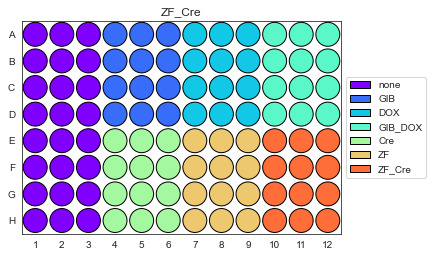

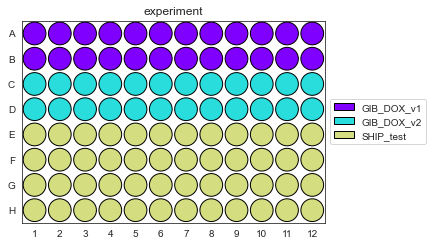

In [3]:
# Import Data - bioreplicate 1
folder = '20240927_GIB-TRE-293T_p1'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder
data1 = data1[ data1['experiment'].isin( pd.array( ['GIB_DOX_v2']))]


In [4]:
display( data1['reporter'].unique())

array(['loxPrept_mG_v2', '203bp_mGL_v2'], dtype=object)

### Data A

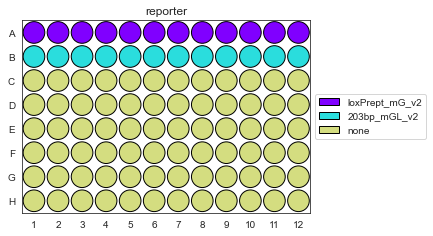

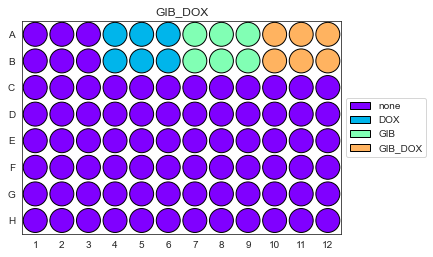

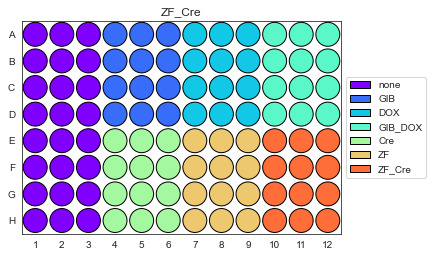

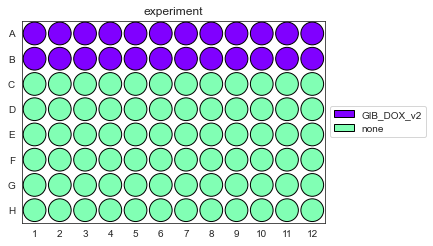

In [5]:
# Import Data - A
folder = '20241004_GIB-TRE_pA'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
yamlA = yaml_path

rd.plot.plot_well_metadata(yaml_path)
dataA = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataA['bioreplicate'] = folder

### Data B

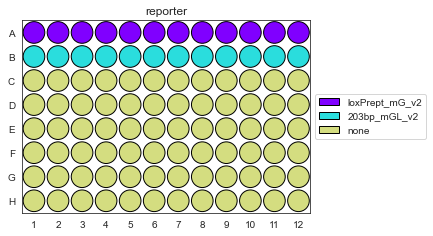

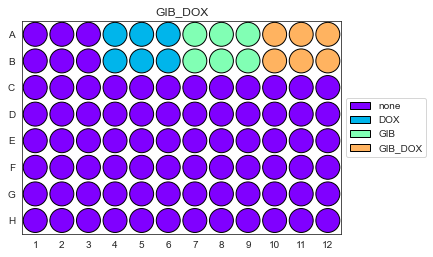

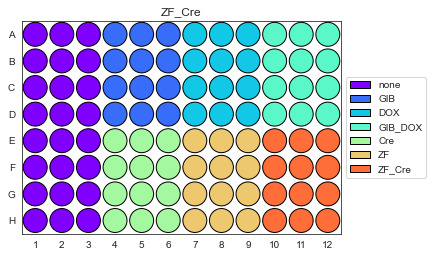

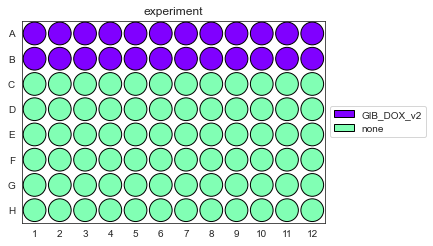

In [6]:
# Import Data - B
folder = '20241004_GIB-TRE_pB'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = yamlA
rd.plot.plot_well_metadata(yaml_path)
dataB = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataB['bioreplicate'] = folder

### Data C

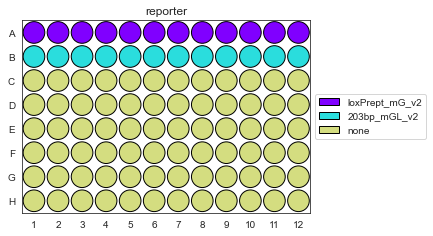

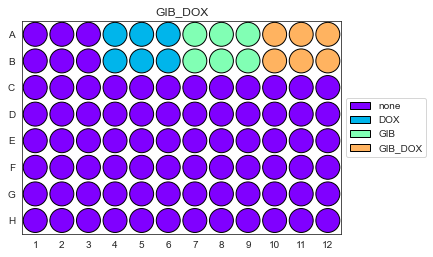

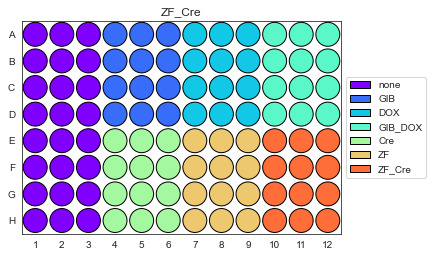

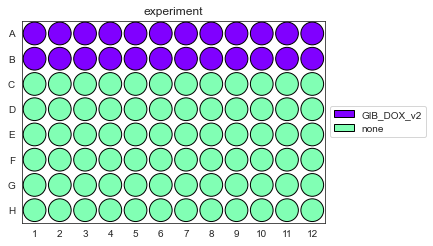

In [7]:
# Import Data - C
folder = '20241004_GIB-TRE_pC'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yamlA = yaml_path
rd.plot.plot_well_metadata(yaml_path)
dataC = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
dataC['bioreplicate'] = folder

## Concatenate

In [8]:
data1 = data1[ data1['GIB_DOX'].isin( pd.array( ['DOX', 'GIB_DOX']))]
data1 = data1[ data1['reporter'].isin( pd.array( ['203bp_mGL_v2']))]

print(pd.unique(data1['GIB_DOX']))

['GIB_DOX' 'DOX']


In [9]:
data = pd.concat( [data1, dataA, dataB, dataC], ignore_index=True)
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
#data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]
data['log10 mGL-A'] = np.log10(data['mGL-A'])

#Combine ZF and Cre Conditions 
#data['Rept.ZF.recombinase'] = data['reporter'] + '.' +data['ZF'] + '.' + data['recombinase']

#Gate iRFP670
iRFP670_gate = 10000 
data_iRFP670gated = data[ data['iRFP670-A'] > iRFP670_gate]

## List parameters

In [10]:
print(data.columns.unique())
print(data['bioreplicate'].unique())
print(pd.unique(data['reporter']))
print(pd.unique(data['GIB_DOX']))

Index(['reporter', 'GIB_DOX', 'ZF_Cre', 'experiment', 'well', 'population',
       'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'mGL-A', 'mGL-H',
       'mGL-W', 'iRFP670-A', 'iRFP670-H', 'iRFP670-W', 'TagBFP-A', 'TagBFP-H',
       'TagBFP-W', 'Janelia Fluor 549-A', 'Janelia Fluor 549-H',
       'Janelia Fluor 549-W', 'mCherry-A', 'mCherry-H', 'mCherry-W', 'Time',
       'bioreplicate', 'log10 mGL-A'],
      dtype='object')
['20240927_GIB-TRE-293T_p1' '20241004_GIB-TRE_pA' '20241004_GIB-TRE_pB'
 '20241004_GIB-TRE_pC']
['203bp_mGL_v2' 'loxPrept_mG_v2' 'none']
['GIB_DOX' 'DOX' 'none' 'GIB']


In [11]:
display(dataA.head())

,reporter,GIB_DOX,ZF_Cre,experiment,well,population,FSC-A,FSC-H,FSC-W,SSC-A,...,TagBFP-H,TagBFP-W,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time,bioreplicate
0,loxPrept_mG_v2,GIB_DOX,GIB_DOX,GIB_DOX_v2,A10,Single Cells,462106,238725,126,331564,...,52,0,425,222,52,12,31,0,0.000000,20241004_GIB-TRE_pA
1,loxPrept_mG_v2,GIB_DOX,GIB_DOX,GIB_DOX_v2,A10,Single Cells,277235,174401,110,136458,...,51,0,115,144,14,39,80,0,0.000000,20241004_GIB-TRE_pA
2,loxPrept_mG_v2,GIB_DOX,GIB_DOX,GIB_DOX_v2,A10,Single Cells,363237,205321,118,244413,...,63,0,256,138,17,-27,33,0,0.000995,20241004_GIB-TRE_pA
3,loxPrept_mG_v2,GIB_DOX,GIB_DOX,GIB_DOX_v2,A10,Single Cells,353541,238289,112,169247,...,86,0,205,130,20,-67,20,0,0.001991,20241004_GIB-TRE_pA
4,loxPrept_mG_v2,GIB_DOX,GIB_DOX,GIB_DOX_v2,A10,Single Cells,558671,240999,130,386770,...,76,0,352,177,42,48,59,0,0.001991,20241004_GIB-TRE_pA


# Analysis

## Joint Plots and histograms

In [ ]:
#set the hue, hue_order, palette 
hue = 'GIB_DOX'; 
palette = {'none': 'grey', 
   'GIB': 'black', 
     'DOX': '#C3DB9A',                                                
      'GIB_DOX': '#69B645'}

data_neg = data[ data['reporter']=='none']

#Iterate through the different conditions 
for rept in pd.array(['203bp_mGL_v2', 'loxPrept_mG_v2']): 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    #data_now = data_now[data_now['bioreplicate']=='20241004_GIB-TRE_pB']
    #data_now = data_now[data_now['well']=='B7']
    display( pd.unique(data_now['GIB_DOX']))
    plottitle = rept

    #joint plot 
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 10000,
                            plottitle=plottitle, hue_order=palette,
                            palette=palette, alpha=.5, type = ['scatter'])
    g.savefig(figure_folder+ plottitle + '.png',dpi=300,bbox_inches='tight')

    # Histogram 
    plottitle = 'hist ' + rept
    h = custom_hist_plot( data_now, ['mGL-A','mCherry-A'], hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                         alpha=0.5, fontsize=18, data_neg= data_neg,
                         legendtitle='Condition',  axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
    h = h.get_figure()
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## mGL hist for figure

In [ ]:
#Set common conditions
hue = 'GIB_DOX'; 
palette = {'none': 'grey', 
   'GIB': 'black', 
     'DOX': '#C3DB9A',                                                
      'GIB_DOX': '#69B645'}
palette_ZF = {'none': 'grey', 
   'GIB': 'black', 
     'DOX': 'darksalmon',                                                
      'GIB_DOX': 'red'}
hueorder=palette
parameters = pd.array(['mGL-A']) ; 
xlim = [1e0,3e5];  
xsize = 2.5
ysize = 1.5

for rept in pd.array(['203bp_mGL_v2', 'loxPrept_mG_v2']): 
    data_now = data_iRFP670gated[ data_iRFP670gated['reporter']== rept]
    data_now = data_now[ data_now['bioreplicate'] == '20241004_GIB-TRE_pC']

    data_neg = data[ data['reporter']=='none']
    g = plt.figure(figsize=(xsize,ysize))
    plottitle = 'hist for figure' + rept
    g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.15, data_neg = data_neg,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    g = plt.figure(figsize=(xsize,ysize))
    plottitle = 'histZF forfigure' + rept
    g = custom_hist_plot( data_now, parameters=pd.array(['mCherry-A']), hue=hue, palette=palette_ZF, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                         alpha=0.15, data_neg = data_neg,
                         legendtitle='Condition', xlim=xlim)
    g = g.get_figure()
    g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Calculate Summary Stats ##

In [14]:
df = data_iRFP670gated

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'GIB_DOX', 'experiment','bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat) #calculate statistics 
display(pd.unique(s['bioreplicate'])) #display results, use for troublshooting
#display(s)

s[['reporter', 'GIB_DOX', 'experiment','mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean']].to_excel('Fig3F-I_S17_GIBCre_TREZF.xlsx',index=False)

array(['20240927_GIB-TRE-293T_p1', '20241004_GIB-TRE_pA',
       '20241004_GIB-TRE_pB', '20241004_GIB-TRE_pC'], dtype=object)

## Fold Change Calculation

In [15]:
# normalize all to the +DOX, -GIB conditon with the 203bp spacer

repts = pd.array(['203bp_mGL_v2'])
s_repts = s[ s['reporter'].isin(repts)]
bios = pd.unique(s_repts['bioreplicate'] )

map_noGIB = {'test':'test'}

for biorep in bios:
    # Normalize all to the noCre ZF37 conditions
    mGL_noCre_ZF37 =  s_repts[ s_repts['GIB_DOX']=='DOX']
    mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['bioreplicate']==biorep]
    mGL_noCre_ZF37= mGL_noCre_ZF37['mGL-A_gmean'].iloc[0]
    map_noGIB[biorep] = mGL_noCre_ZF37

s['mGL_noGIB'] = s['bioreplicate'].map(map_noGIB)
s['Fold Change'] = s['mGL-A_gmean'] / s['mGL_noGIB']



## Plot fold change and summary plot 

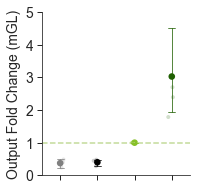

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DOX v.s. GIB_DOX: t-test independent samples, P_val=2.437e-02 stat=-2.989e+00


<Figure size 432x288 with 0 Axes>

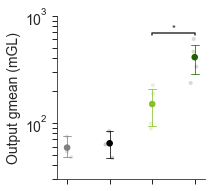

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DOX v.s. GIB_DOX: t-test independent samples, P_val=7.803e-01 stat=-2.918e-01


<Figure size 432x288 with 0 Axes>

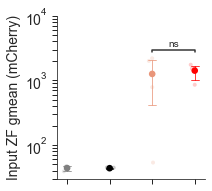

<Figure size 432x288 with 0 Axes>

In [16]:

rept = '203bp_mGL_v2'
x = 'GIB_DOX'; x_rot = 45
xlabel = ''
fontsize = 14
xsize =4/3*2  ; ysize = 3
fontsize = 14
hue = None;  hueorder = None; 
yscales = pd.array(['log'])
ylim = [0,5]
pairs = [ 
    #['none','GIB'], 
    #['DOX','GIB'],
        ['DOX','GIB_DOX']]
palette = {'none': 'grey', 
   'GIB': 'black', 
     'DOX': "#87C027",       #'#C3DB9A',                                               
      'GIB_DOX':  "#206002"}   # '#69B645'}
order =  palette
data_now = s[ s['reporter']==rept]
#data_now = data_now[ data_now['bioreplicate'] != '20240927_GIB-TRE-293T_p1']

y = 'Fold Change'
ylabel = 'Output Fold Change (mGL)'
yscale = 'linear'
plottitle = rept + ' ' + y + 'mGL only'
g = plt.figure(figsize=(xsize,ysize))
plt.axhline(y=1, ls='--', color='#C3DB9A')
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize,ylabel=ylabel,xlabel=xlabel,xticklabels=False,
                pairs=[] )
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

y = 'mGL-A_gmean'
ylabel = 'Output gmean (mGL)'
yscale = 'log'
ylim = [3e1, 1e3]
plottitle = rept + ' ' + y + 'mGL only'
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=False, xlabel=xlabel,
                pairs=pairs )
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


palette_ZF = {'none': 'grey', 
   'GIB': 'black', 
     'DOX': 'darksalmon',                                                
      'GIB_DOX': 'red'}
y = 'mCherry-A_gmean'
ylabel = 'Input ZF gmean (mCherry)'
yscale = 'log'
ylim = [3e1, 1e4]
plottitle = rept + ' ' + y + 'mCh only'
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette_ZF, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=False, xlabel=xlabel,
                pairs=pairs )
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Mean Fold Change

In [ ]:
df = s

by = ['reporter','GIB_DOX'] #how to filter results, columns
x = ['Fold Change'] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
s_fold_change_means = calc_stats(df,by,x,stat)

display(s_fold_change_means)
